Here we will do some analysis on a dummy dataset. This is in response to the fact that we cannot get the data we need on forex from `alpha vantage API` without a premium account. We will therefore try to make the most use of this example data.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/fx_daily_EUR_USD.csv")

## Exploration

In [3]:
df.head(2)

,timestamp,open,high,low,close
0,2023-09-01,1.08441,1.08819,1.07706,1.07733
1,2023-08-31,1.09227,1.09394,1.08348,1.08415


In [4]:
df.shape

(100, 5)

In [5]:
df.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
dtype: object

In [19]:
df.isna().any()

open     False
high     False
low      False
close    False
dtype: bool

### Preprocessing

In [7]:
df.timestamp = pd.to_datetime(df.timestamp)

In [10]:
df.set_index('timestamp', inplace=True)

### Visualization

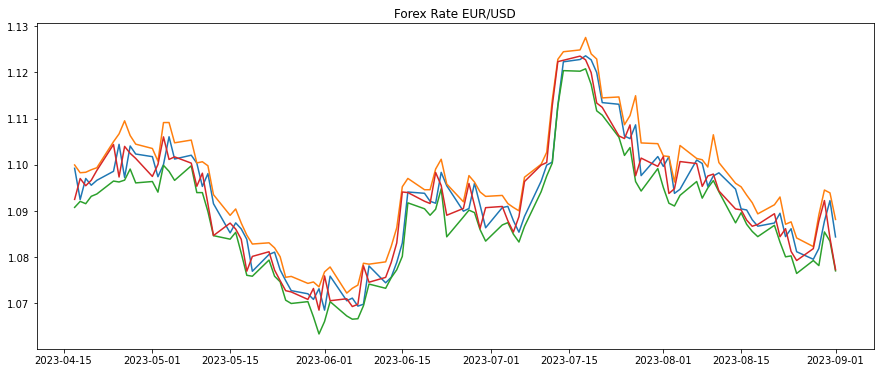

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df)
plt.title("Forex Rate EUR/USD")
plt.show()

## Model Building

### AutoCorrelation

In [20]:
from pandas.plotting import autocorrelation_plot

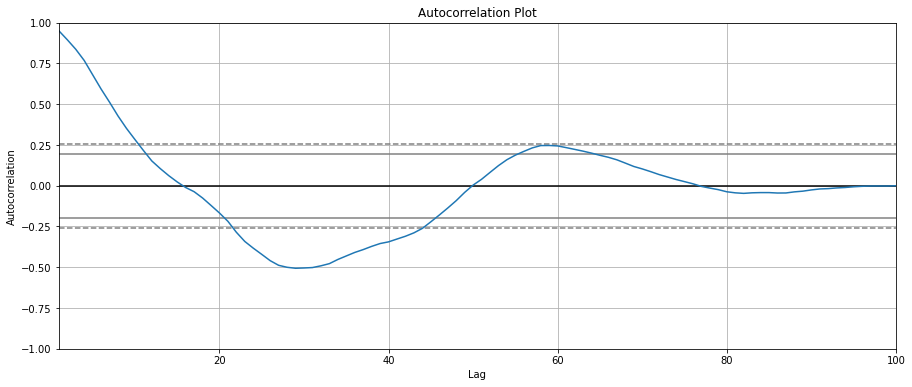

In [24]:
plt.figure(figsize=(15, 6))
autocorrelation_plot(df.high)
plt.title("Autocorrelation Plot")
plt.show()

This gives us a `lag` of about 15

### ARIMA

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
X = df.high
model = ARIMA(X, order=(15, 1, 0))
fit = model.fit()
fit.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   high   No. Observations:                  100
Model:                ARIMA(15, 1, 0)   Log Likelihood                 412.728
Date:                Sun, 03 Sep 2023   AIC                           -793.457
Time:                        16:46:51   BIC                           -751.935
Sample:                             0   HQIC                          -776.657
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0529      0.121      0.435      0.663      -0.185       0.291
ar.L2          0.0733      0.122      0.602      0.547      -0.165       0.312
ar.L3          0.1009      0.131      0.772      0.440      -0.155       0.357
ar.L4          0.1985      0.106      1.867      0.062      -0.010       0.407
ar.L5         -0.0435      0.124     -0.352      0.725      -0.286       0.199
ar.L6         -0.1520      0.126     -1.208      0.227      -0.399       0.095
ar.L7         -0.0591      0.118     -0.502      0.616      -0.290       0.172
ar.L8         -0.0164      0.135     -0.122      0.903      -0.281       0.248
ar.L9         -0.0156      0.138     -0.113      0.910      -0.287       0.256
ar.L10         0.0535      0.128      0.419      0.675      -0.197       0.304
ar.L11         0.0564      0.118      0.480      0.631      -0.174       0.287
ar.L12        -0.2118      0.124     -1.707      0.088      -0.455       0.031
ar.L13         0.0048      0.131      0.036      0.971      -0.253       0.262
ar.L14        -0.0437      0.140     -0.312      0.755      -0.318       0.231
ar.L15        -0.0066      0.135     -0.049      0.961      -0.271       0.258
sigma2      1.386e-05   2.18e-06      6.345      0.000    9.58e-06    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.70   Prob(JB):                         0.66
Heteroskedasticity (H):               0.59   Skew:                            -0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

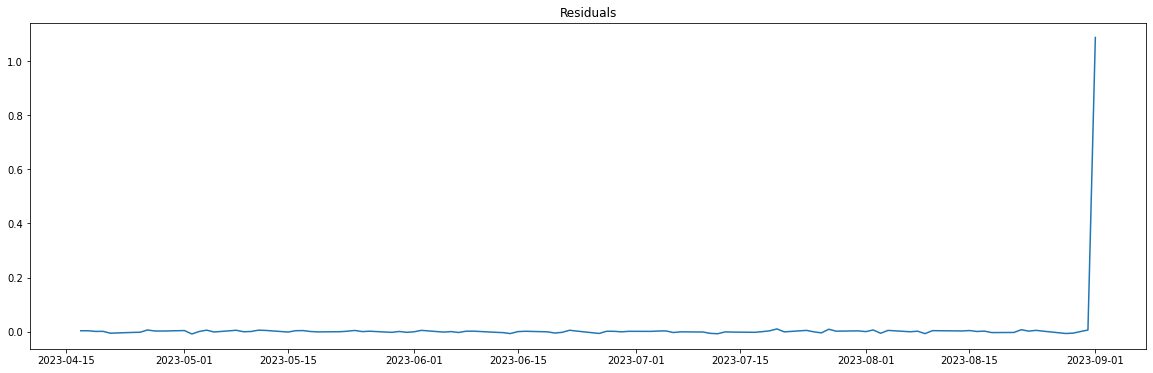

In [32]:
residuals = fit.resid
plt.figure(figsize=(20, 6))
plt.plot(residuals)
plt.title("Residuals")
plt.show()

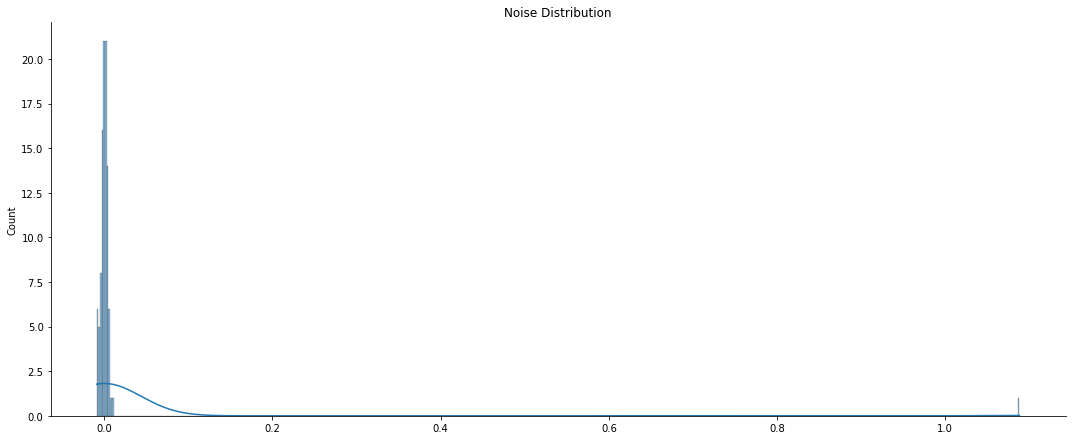

In [35]:
sns.displot(residuals, kde=True, height=6, aspect=2.5)
plt.title("Noise Distribution")
plt.show()

### Conclusion
Results from ARIMA seem fine, with preliminary diagnostics within expected bounds.